In [1]:
import networkx as nx
import random

In [8]:
import matplotlib.pyplot as plt

In [22]:
from collections import defaultdict

In [2]:
Nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

In [32]:
def create_graph(nodes=Nodes):
    nx_graph = nx.Graph()
    nx_graph.add_nodes_from(nodes)
    n = set()
    while len(n) < len(nodes):
        e = random.choice(nodes)
        d = random.sample(nodes, random.randint(1,3))
        if (e not in n) and (e not in d):
            n.add(e)
            wt = [(e, i, random.randint(1,10)) for i in d]
            nx_graph.add_weighted_edges_from(wt)
    return nx_graph

In [33]:
G = create_graph()

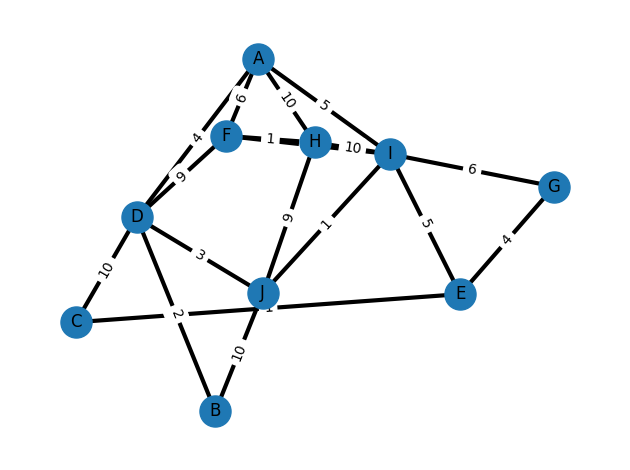

In [53]:
pos = nx.spring_layout(G, seed = 9)
nx.draw_networkx_nodes(G, pos, node_size=500)
edge_list = [(u, v) for (u, v, d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, edgelist=edge_list, width=3)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels)
ax = plt.gca()
ax.margins(0.08)
plt.axis('off')
plt.tight_layout()
plt.show()

In [37]:
e_w_list = [(u, v, d['weight']) for (u, v, d) in G.edges(data=True)]
e_w_list

[('A', 'I', 5),
 ('A', 'D', 4),
 ('A', 'F', 6),
 ('A', 'H', 10),
 ('B', 'D', 2),
 ('B', 'J', 10),
 ('C', 'D', 10),
 ('C', 'E', 1),
 ('D', 'J', 3),
 ('D', 'F', 9),
 ('E', 'I', 5),
 ('E', 'G', 4),
 ('F', 'I', 8),
 ('F', 'H', 1),
 ('G', 'I', 6),
 ('H', 'I', 10),
 ('H', 'J', 9),
 ('I', 'J', 1)]

In [38]:
g_dict = defaultdict(dict)
for e, dest, w in e_w_list:
    g_dict[e][dest] = w
    g_dict[dest][e] = w

In [39]:
g_dict

defaultdict(dict,
            {'A': {'I': 5, 'D': 4, 'F': 6, 'H': 10},
             'I': {'A': 5, 'E': 5, 'F': 8, 'G': 6, 'H': 10, 'J': 1},
             'D': {'A': 4, 'B': 2, 'C': 10, 'J': 3, 'F': 9},
             'F': {'A': 6, 'D': 9, 'I': 8, 'H': 1},
             'H': {'A': 10, 'F': 1, 'I': 10, 'J': 9},
             'B': {'D': 2, 'J': 10},
             'J': {'B': 10, 'D': 3, 'H': 9, 'I': 1},
             'C': {'D': 10, 'E': 1},
             'E': {'C': 1, 'I': 5, 'G': 4},
             'G': {'E': 4, 'I': 6}})

In [25]:
from heapq import heapify, heappop, heappush
# source:
# https://www.datacamp.com/tutorial/dijkstra-algorithm-in-python

class _Graph:
    def __init__(self, graph: dict = {}):
        self.graph = graph


    def add_edge(self, node1, node2, weight):
        if node1 not in self.graph:
            self.graph[node1] = {}
        self.graph[node1][node2] = weight


    def shortest_distances(self, source: str):
        distances = {node: float('inf') for node in self.graph}
        distances[source] = 0


        priority_q = [(0, source)]
        heapify(priority_q)

        visited = set()

        while priority_q:
            current_distance, current_node = heappop(priority_q)

            if current_node in visited:
                continue
            visited.add(current_node)

            for neighbour, weight in self.graph[current_node].items():
                tentative_distance = current_distance + weight
                if tentative_distance < distances[neighbour]:
                    distances[neighbour] = tentative_distance
                    heappush(priority_q, (tentative_distance, neighbour))

        predecessors = {node: None for node in self.graph}

        for node, distance in distances.items():
            for neighbour, weight in self.graph[node].items():
                if distances[neighbour] == distance + weight:
                    predecessors[neighbour] = node

        return distances, predecessors

    def shortest_path(self, source: str, target: str):
        _, predecessors = self.shortest_distances(source)

        path = []
        current_node = target

        while current_node:
            path.append(current_node)
            current_node = predecessors[current_node]

        path.reverse()
        return path

In [46]:
DG = _Graph(g_dict)

In [48]:
DG.shortest_path('C', 'J')

['C', 'E', 'I', 'J']

In [49]:
nx_nodes = nx.dijkstra_path(G, 'C', 'J')
nx_nodes

['C', 'E', 'I', 'J']